<a href="https://colab.research.google.com/github/LucasLucena001/MetricsChurn/blob/main/MetricasChurn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel('/content/churn_data.xlsx')

In [3]:
df.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer,42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.dtypes

customerID           object
tenure                int64
PhoneService         object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')

In [7]:
df.dtypes

customerID           object
tenure                int64
PhoneService         object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [8]:
df = df.dropna()

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
cat_vars = ['PhoneService', 'Contract', 'PaperlessBilling', 'PaymentMethod']
num_vars = ['tenure', 'MonthlyCharges', 'TotalCharges']
modeling_vars = cat_vars + num_vars

In [12]:
X = df.filter(modeling_vars).copy()
y = df['Churn'].copy()

In [13]:
y = pd.DataFrame(y)

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
le = LabelEncoder()

le.fit(y.Churn)
y.Churn = le.transform(y.Churn)

In [16]:
y

,Churn
0,0
1,0
2,1
3,0
4,1
...,...
7037,0
7038,0
7039,0
7040,0


In [19]:
X = pd.get_dummies(X, dtype=np.int8)
X.head()

,tenure,MonthlyCharges,TotalCharges,PhoneService_No,PhoneService_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,True,False,True,False,False,False,True,False,False,True,False
1,34,56.95,1889.50,False,True,False,True,False,True,False,False,False,False,True
2,2,53.85,108.15,False,True,True,False,False,False,True,False,False,False,True
3,45,42.30,1840.75,True,False,False,True,False,True,False,True,False,False,False
4,2,70.70,151.65,False,True,True,False,False,False,True,False,False,True,False


In [20]:

def transform_bool_to_int(df):
  for column in df.select_dtypes(include='bool').columns:
    df[column] = df[column].astype(int)
  return df

X = transform_bool_to_int(X)
X.head()


,tenure,MonthlyCharges,TotalCharges,PhoneService_No,PhoneService_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,1,0,1,0,0,0,1,0,0,1,0
1,34,56.95,1889.50,0,1,0,1,0,1,0,0,0,0,1
2,2,53.85,108.15,0,1,1,0,0,0,1,0,0,0,1
3,45,42.30,1840.75,1,0,0,1,0,1,0,1,0,0,0
4,2,70.70,151.65,0,1,1,0,0,0,1,0,0,1,0


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 20, stratify = y)

In [23]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
lr = model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
lr.predict(X_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0])

In [25]:
X_test.assign(churn = y_test).assign(label = lr.predict(X_test))

,tenure,MonthlyCharges,TotalCharges,PhoneService_No,PhoneService_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check,churn,label
1692,39,25.25,947.75,1,0,0,1,0,0,1,0,1,0,0,0,0
4880,50,20.55,1067.65,0,1,0,0,1,1,0,0,0,0,1,0,0
6843,9,91.75,865.80,0,1,1,0,0,1,0,1,0,0,0,1,1
6176,43,77.85,3365.85,0,1,1,0,0,0,1,0,0,1,0,1,0
2518,24,99.65,2404.85,0,1,1,0,0,0,1,1,0,0,0,0,1
4494,3,84.30,235.05,0,1,1,0,0,1,0,0,0,1,0,0,1
6668,38,103.65,3988.50,0,1,1,0,0,0,1,0,0,1,0,0,1
1709,30,69.10,2093.90,0,1,0,0,1,0,1,0,1,0,0,0,0
2323,29,98.60,2933.20,0,1,1,0,0,0,1,0,1,0,0,1,0
6275,62,69.40,4237.50,0,1,0,0,1,1,0,1,0,0,0,0,0


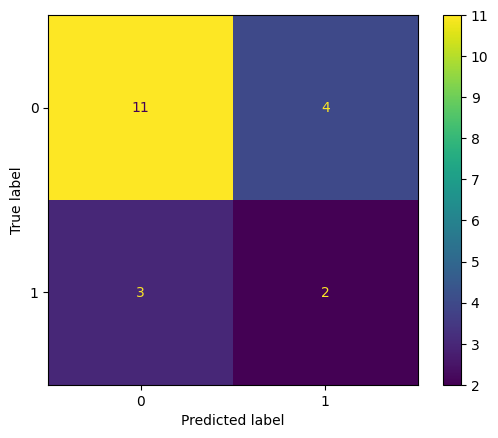

In [29]:
!pip install --upgrade scikit-learn
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_estimator(lr, X_test, y_test, values_format = 'd')
plt.show()

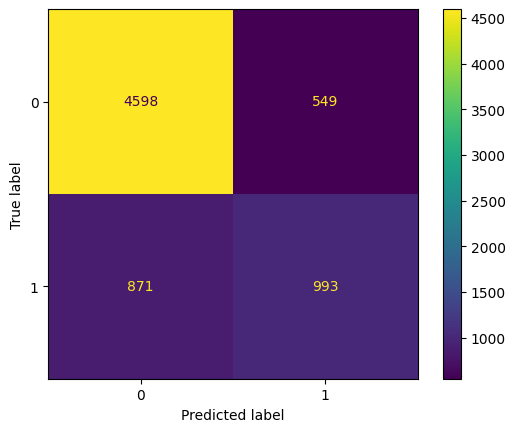

In [30]:
ConfusionMatrixDisplay.from_estimator(lr, X_train, y_train, values_format = 'd')
plt.show()

In [31]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [35]:
print(f'Acurácia Treino: {accuracy_score(y_train, lr.predict(X_train))}')
print(f'Acurácia Teste: {accuracy_score(y_test, lr.predict(X_test))}')
print('====================================')
print(f'Acurácia Balanceada Treino: {balanced_accuracy_score(y_train, lr.predict(X_train))}')
print(f'Acurácia Balanceada Teste: {balanced_accuracy_score(y_test, lr.predict(X_test))}')
print('====================================')
print(f'Precisão Treino: {precision_score(y_train, lr.predict(X_train))}')
print(f'Precisão Teste: {precision_score(y_test, lr.predict(X_test))}')
print('====================================')
print(f'Recall Treino: {recall_score(y_train, lr.predict(X_train))}')
print(f'Recall Teste: {recall_score(y_test, lr.predict(X_test))}')
print('====================================')
print(f'F1 Score Treino: {f1_score(y_train, lr.predict(X_train))}')
print(f'F1 Score Teste: {f1_score(y_test, lr.predict(X_test))}')
print('====================================')
print(f'ROCAUC Treino: {roc_auc_score(y_train, lr.predict_proba(X_train)[:, 1])}')
print(f'ROCAUC Teste: {roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1])}')


Acurácia Treino: 0.7974611325060619
Acurácia Teste: 0.65
Acurácia Balanceada Treino: 0.7130306228637708
Acurácia Balanceada Teste: 0.5666666666666667
Precisão Treino: 0.6439688715953308
Precisão Teste: 0.3333333333333333
Recall Treino: 0.532725321888412
Recall Teste: 0.4
F1 Score Treino: 0.5830886670581328
F1 Score Teste: 0.3636363636363636
ROCAUC Treino: 0.8385999365437261
ROCAUC Teste: 0.7466666666666667


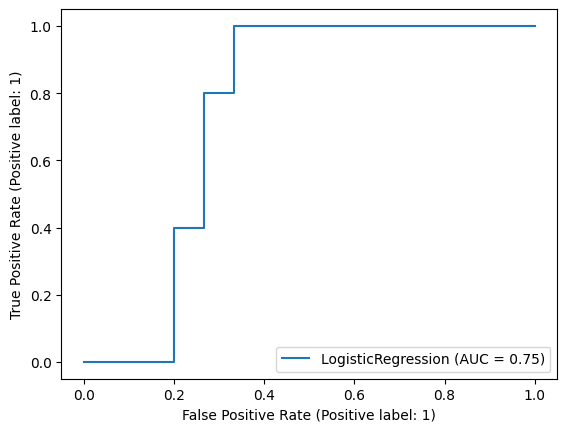

In [40]:
!pip install --upgrade scikit-learn
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

RocCurveDisplay.from_estimator(lr, X_test, y_test)
plt.show()

In [38]:
metricas = {
    'model': ['Logistic Regression', 'Logistic Regression'],
    'modo': ['treino', 'teste'],
    'accuracy': [accuracy_score(y_train, lr.predict(X_train)), accuracy_score(y_test, lr.predict(X_test))],
    'balanced_accuracy': [balanced_accuracy_score(y_train, lr.predict(X_train)), balanced_accuracy_score(y_test, lr.predict(X_test))],
    'precision': [precision_score(y_train, lr.predict(X_train)), precision_score(y_test, lr.predict(X_test))],
    'recall': [recall_score(y_train, lr.predict(X_train)), recall_score(y_test, lr.predict(X_test))],
    'f1_score': [f1_score(y_train, lr.predict(X_train)), f1_score(y_test, lr.predict(X_test))],
    'rocauc': [roc_auc_score(y_train, lr.predict_proba(X_train)[:,1]), roc_auc_score(y_test, lr.predict_proba(X_test)[:,1])]

}

pd.DataFrame(metricas)

,model,modo,accuracy,balanced_accuracy,precision,recall,f1_score,rocauc
0,Logistic Regression,treino,0.797461,0.713031,0.643969,0.532725,0.583089,0.838600
1,Logistic Regression,teste,0.650000,0.566667,0.333333,0.400000,0.363636,0.746667
